<a href="https://colab.research.google.com/github/uma67f7/CSD/blob/master/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
sales = 200 + 10*np.sin(2*np.pi*dates.dayofyear/365) + 0.1*np.arange(len(dates)) + np.random.normal(0, 5, len(dates))
data = pd.DataFrame({'date': dates, 'sales': sales})
data.set_index('date', inplace=True)

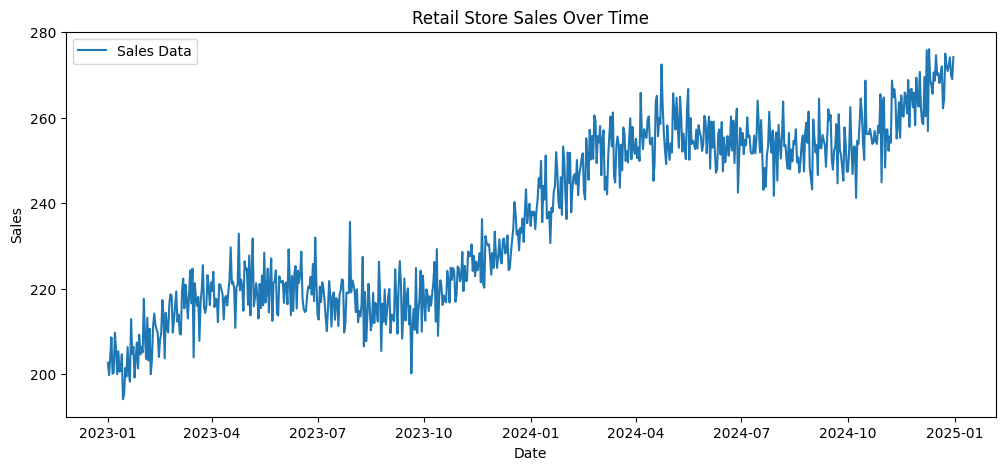

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(data['sales'], label='Sales Data')
plt.title('Retail Store Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

In [ ]:
model = SARIMAX(train['sales'],
                order=(1,1,1),
                seasonal_order=(1,1,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)

sarima_model = model.fit(disp=False)
print(sarima_model.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1749.246
Date:                           Sat, 08 Nov 2025   AIC                           3508.492
Time:                                   08:47:18   BIC                           3530.194
Sample:                               01-01-2023   HQIC                          3516.961
                                    - 08-06-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0354      0.049     -0.721      0.471      -0.131       0.061
ma.L1         -0.8691      0.025    -34.312

In [ ]:
forecast_steps = len(test)
forecast = sarima_model.get_forecast(steps=forecast_steps)
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

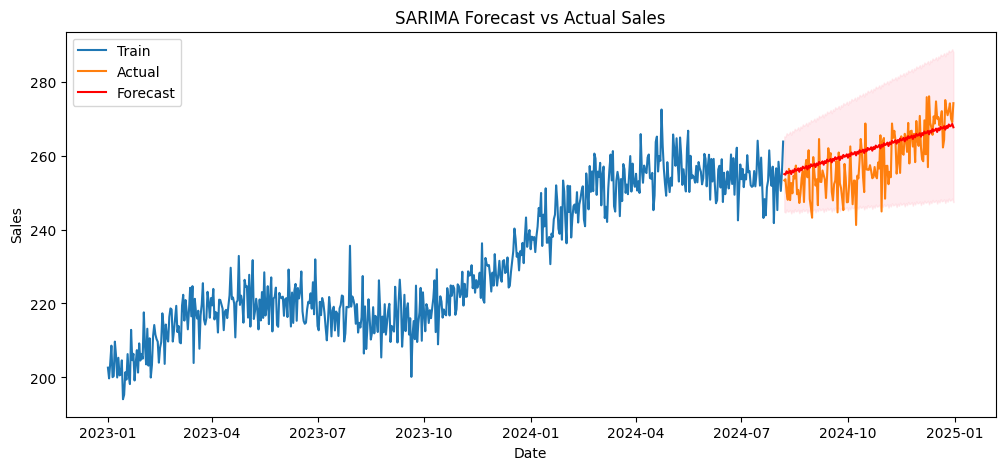

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Actual')
plt.plot(test.index, pred_mean, label='Forecast', color='red')
plt.fill_between(test.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
mae = mean_absolute_error(test['sales'], pred_mean)
rmse = np.sqrt(mean_squared_error(test['sales'], pred_mean))
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 5.37
Root Mean Squared Error: 6.56


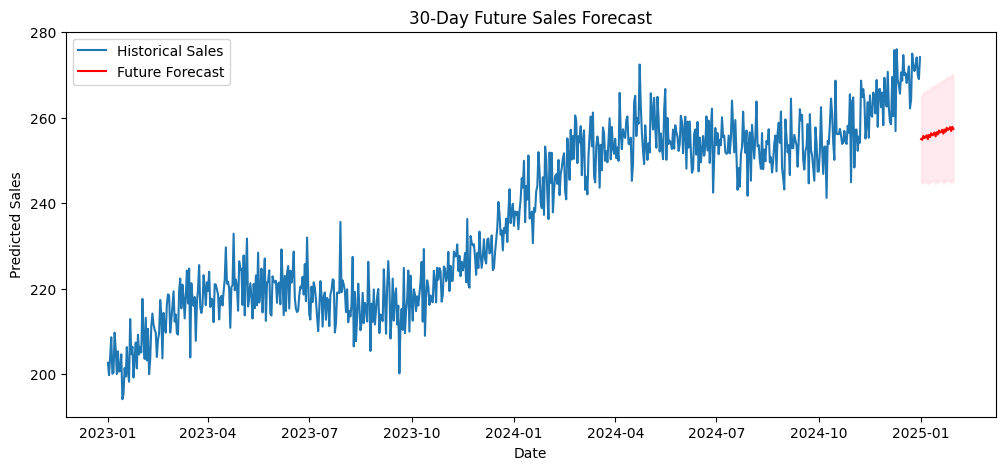

In [ ]:
future_forecast = sarima_model.get_forecast(steps=30)
future_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_mean = future_forecast.predicted_mean
future_conf = future_forecast.conf_int()

plt.figure(figsize=(12,5))
plt.plot(data['sales'], label='Historical Sales')
plt.plot(future_index, future_mean, label='Future Forecast', color='red')
plt.fill_between(future_index,
                 future_conf.iloc[:, 0],
                 future_conf.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('30-Day Future Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()